In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('survey_results_public.csv')
df.set_index("ResponseId", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 1 to 89184
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Q120                                 89184 non-null  object 
 1   MainBranch                           89184 non-null  object 
 2   Age                                  89184 non-null  object 
 3   Employment                           87898 non-null  object 
 4   RemoteWork                           73810 non-null  object 
 5   CodingActivities                     73764 non-null  object 
 6   EdLevel                              87973 non-null  object 
 7   LearnCode                            87663 non-null  object 
 8   LearnCodeOnline                      70084 non-null  object 
 9   LearnCodeCoursesCert                 37076 non-null  object 
 10  YearsCode                            87435 non-null  object 
 11  YearsCodePro                     

(array([0.33, 1.58, 2.83, 4.08, 5.33, 6.58, 7.83, 9.08]),
 [Text(0.33, 0, '18-24 years old'),
  Text(1.58, 0, '25-34 years old'),
  Text(2.83, 0, '35-44 years old'),
  Text(4.08, 0, '45-54 years old'),
  Text(5.33, 0, '55-64 years old'),
  Text(6.58, 0, '65 years or older'),
  Text(7.83, 0, 'Prefer not to say'),
  Text(9.08, 0, 'Under 18 years old')])

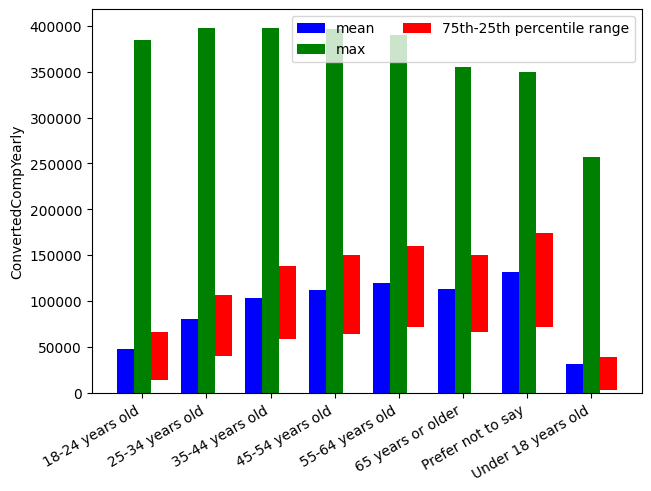

In [6]:
filtered = df[df["ConvertedCompYearly"].isna() == False]
q_hi = filtered["ConvertedCompYearly"].quantile(0.99) #get the 99th percentile (outliers, probably data errors)
filtered = filtered[((filtered["ConvertedCompYearly"] < q_hi) & (filtered["ConvertedCompYearly"] > 0))]
grouped = filtered.groupby("Age")["ConvertedCompYearly"]

indexes = grouped.mean().index
bar_width = 0.33
x = np.arange(len(grouped.mean().index))
adjustedX = x * 1.25
fig, ax = plt.subplots(layout='constrained')

bar = ax.bar(adjustedX, grouped.mean(), bar_width, color="blue", label="mean")
max_bar = ax.bar(adjustedX + bar_width, grouped.max(), bar_width, color="green", label="max")

q75 = grouped.quantile(0.75)
q25 = grouped.quantile(0.25)
bar_height = q75 - q25
box_bar = ax.bar(adjustedX + bar_width*2, bar_height, bar_width, bottom=q25, color="red", label="75th-25th percentile range")

ax.legend(ncols=2, loc="upper right")
ax.set_xticks(adjustedX + bar_width, indexes)
ax.set_ylabel('ConvertedCompYearly')
plt.xticks(rotation=30, ha="right")

C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\894797047.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


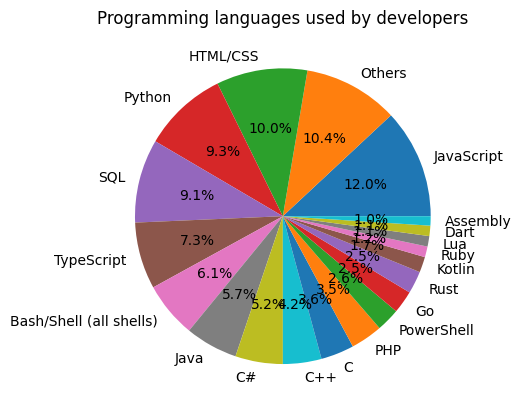

In [36]:
programming_langs = df["LanguageHaveWorkedWith"].str.split(";", expand=True).stack().value_counts()
langs_sum = programming_langs.sum()
langs_filter = langs_sum * 0.01
programming_langs_others = programming_langs[programming_langs <= langs_filter].sum()
programming_langs = programming_langs[programming_langs > langs_filter]
pie_values = programming_langs.add(pd.Series(programming_langs_others, index=["Others"]), fill_value=0)

pie_values = pie_values.sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(pie_values, labels=pie_values.index, autopct='%1.1f%%')
ax.set_title("Programming languages used by developers")
fig.show()

C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\2951923052.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\2951923052.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\2951923052.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\2951923052.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\2951923052.py:13: UserWarning: Matplotlib is currently using m

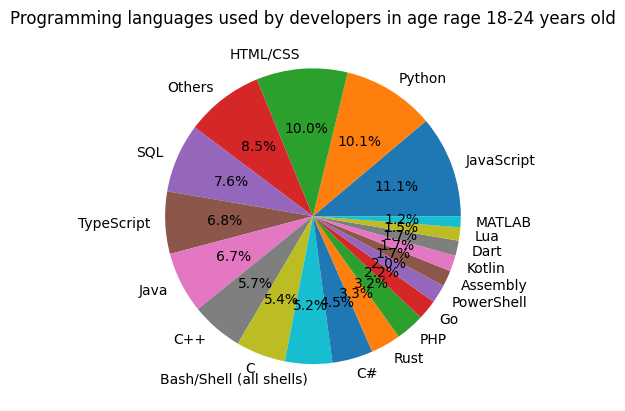

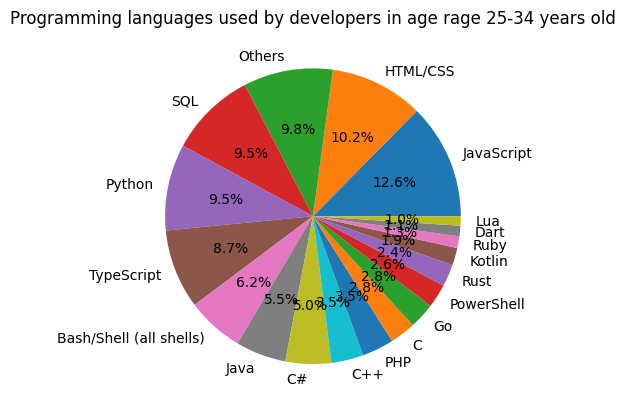

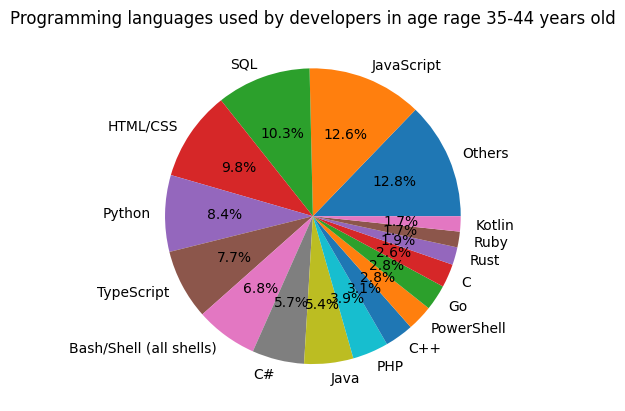

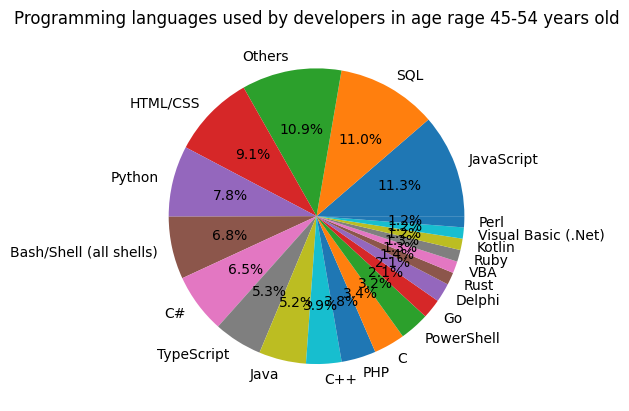

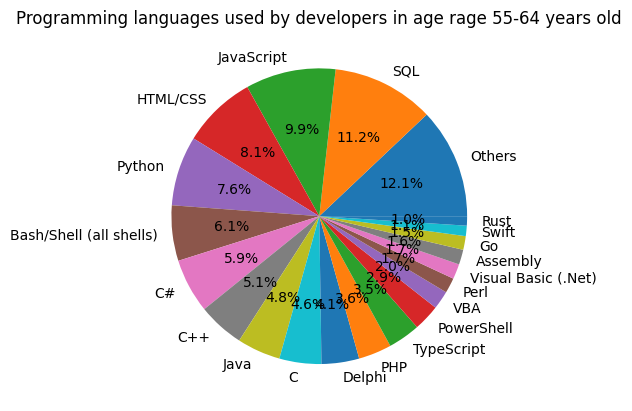

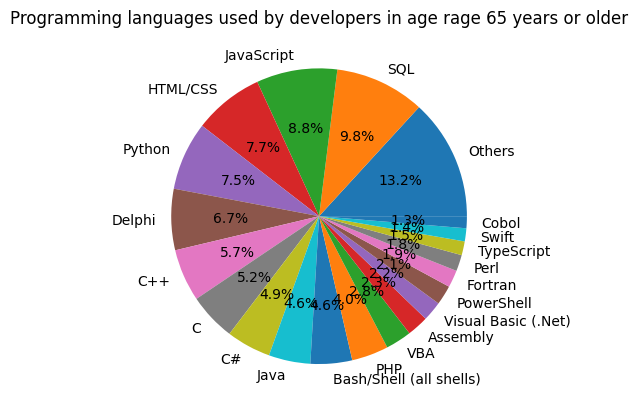

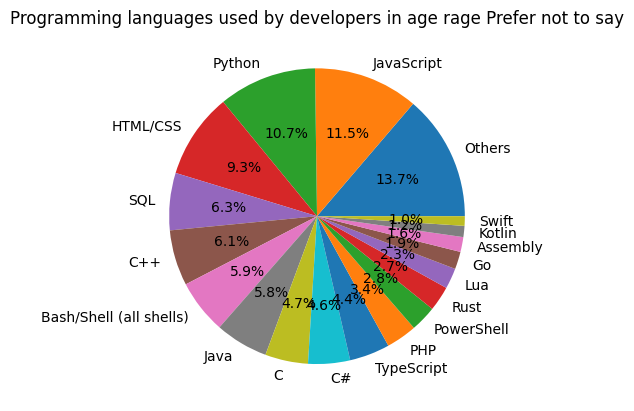

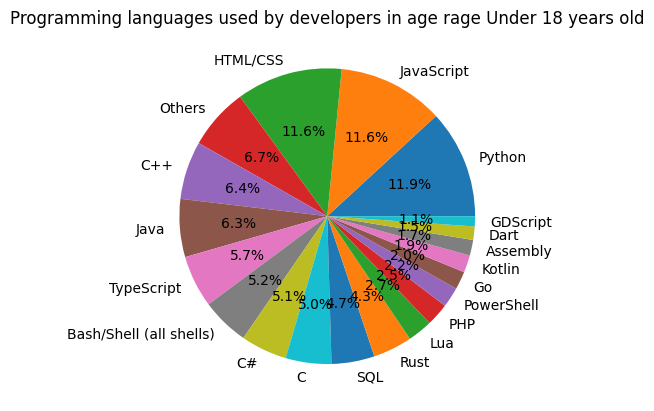

In [44]:
langs_by_age = df.groupby("Age")["LanguageHaveWorkedWith"]
for age, langs in langs_by_age:
    langs = langs.str.split(";", expand=True).stack().value_counts()
    langs_by_age_sum = langs.sum()
    langs_by_age_filter = langs_by_age_sum * 0.01
    langs_others = langs[langs <= langs_by_age_filter].sum()
    langs = langs[langs > langs_by_age_filter]
    pie_by_age_values = langs.add(pd.Series(langs_others, index=["Others"]), fill_value=0)
    pie_by_age_values = pie_by_age_values.sort_values(ascending=False)
    fig, ax = plt.subplots()
    ax.pie(pie_by_age_values, labels=pie_by_age_values.index, autopct='%1.1f%%')
    ax.set_title("Programming languages used by developers in age range " + str(age))
    fig.show()


C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\104978418.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


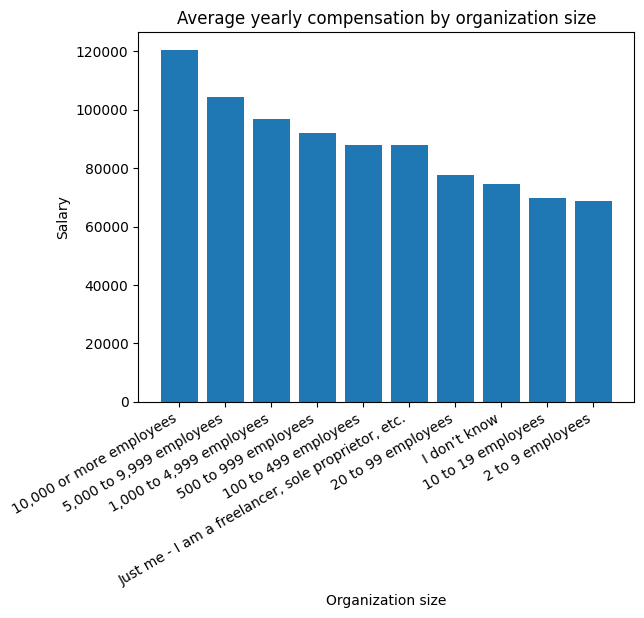

In [56]:
q_hi = df["ConvertedCompYearly"].quantile(0.99)
filtered_salaries = df[((df["ConvertedCompYearly"].isna() == False) & (df["ConvertedCompYearly"] > 0) & (df["ConvertedCompYearly"] < q_hi))] 
org_sizes = filtered_salaries.groupby(["OrgSize"])["ConvertedCompYearly"].mean()
org_sizes = org_sizes.sort_values(ascending=False)

fig, ax = plt.subplots()
ax.bar(org_sizes.index, org_sizes)
ax.set_title("Average yearly compensation by organization size")
ax.set_ylabel("Salary")
ax.set_xlabel("Organization size")
plt.xticks(rotation=30, ha="right")
fig.show()

C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\847973706.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


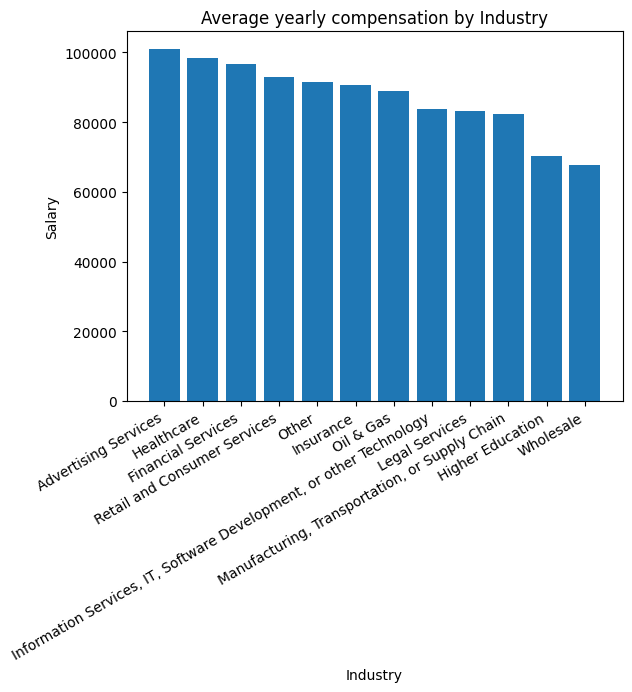

In [57]:
q_hi = df["ConvertedCompYearly"].quantile(0.99)
filtered_salaries = df[((df["ConvertedCompYearly"].isna() == False) & (df["ConvertedCompYearly"] > 0) & (df["ConvertedCompYearly"] < q_hi))] 
org_sizes = filtered_salaries.groupby(["Industry"])["ConvertedCompYearly"].mean()
org_sizes = org_sizes.sort_values(ascending=False)

fig, ax = plt.subplots()
ax.bar(org_sizes.index, org_sizes)
ax.set_title("Average yearly compensation by Industry")
ax.set_ylabel("Salary")
ax.set_xlabel("Industry")
plt.xticks(rotation=30, ha="right")
fig.show()

C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\1304873937.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\1304873937.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\1304873937.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\1304873937.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rfatu\AppData\Local\Temp\ipykernel_32164\1304873937.py:19: UserWarning: Matplotlib is currently using m

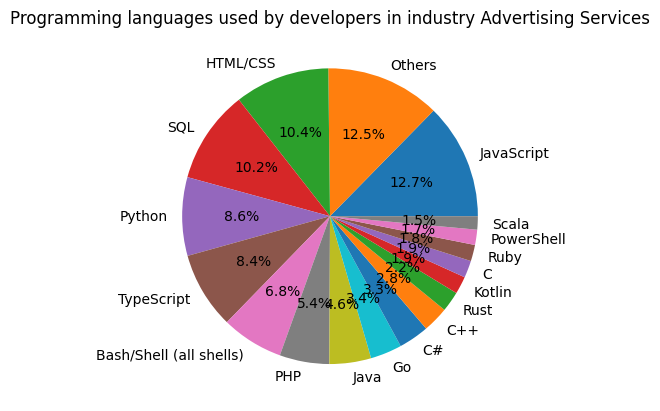

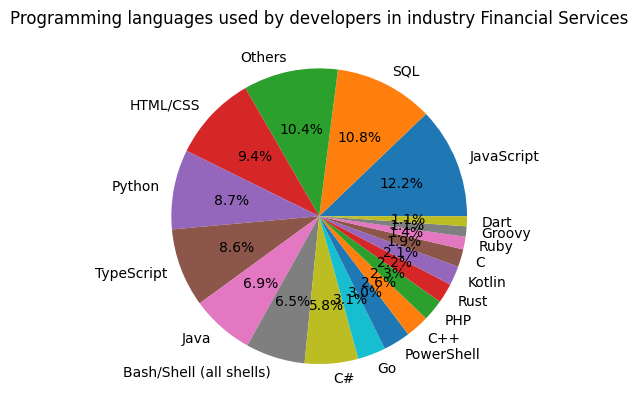

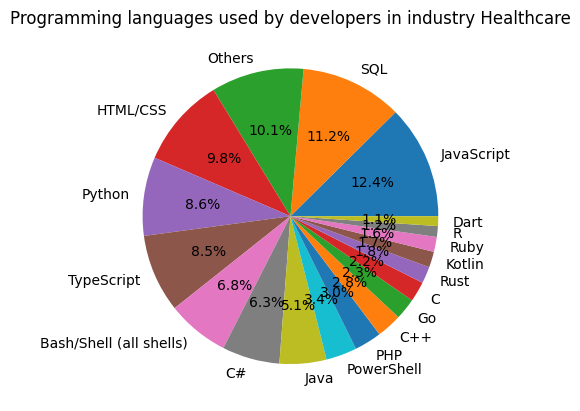

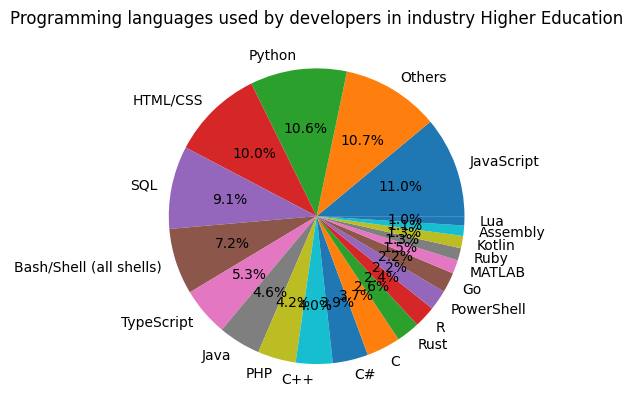

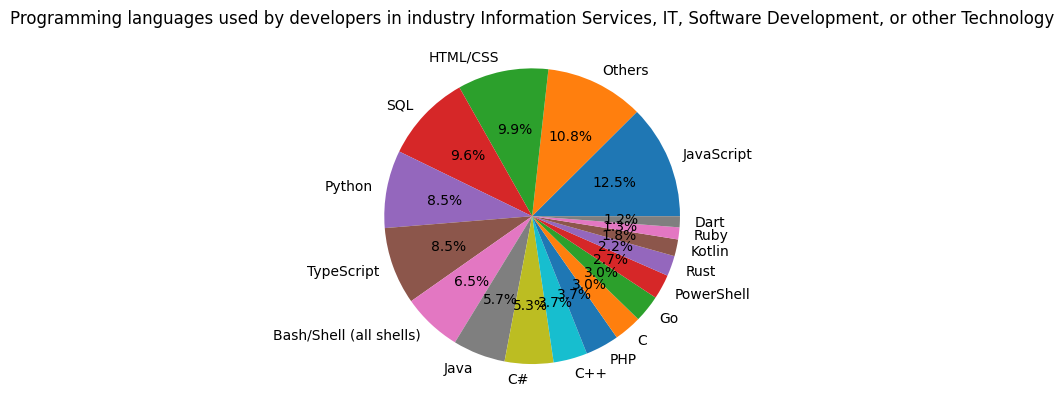

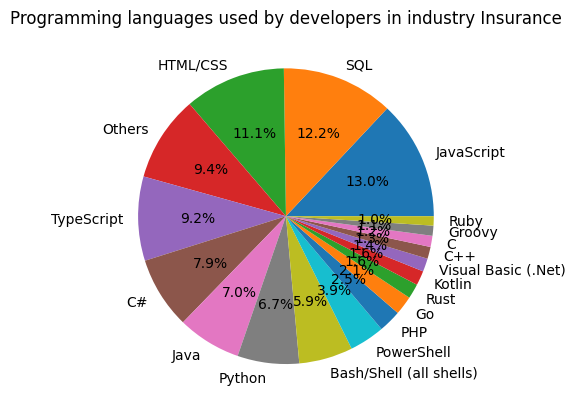

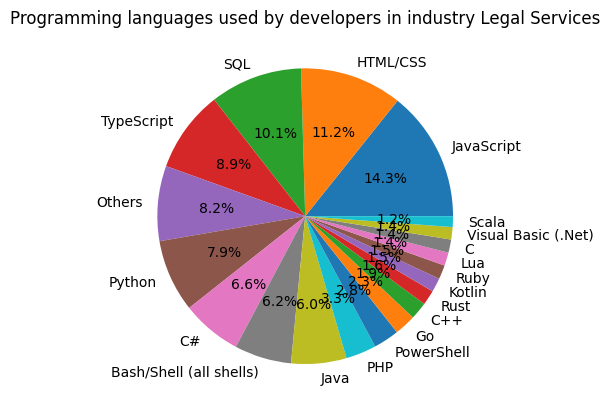

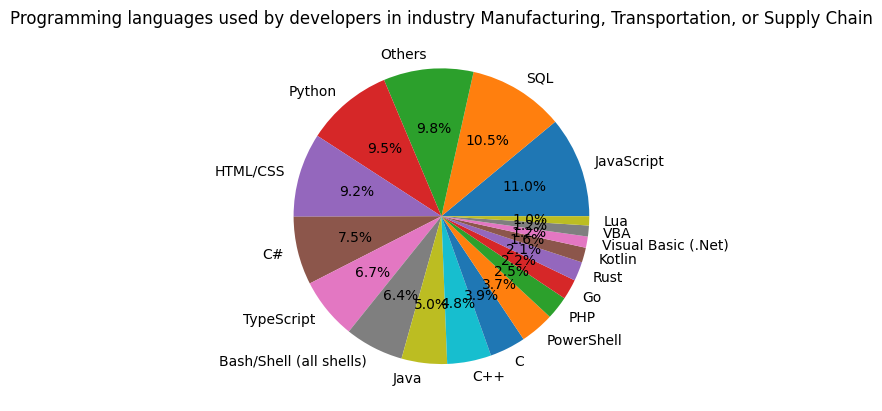

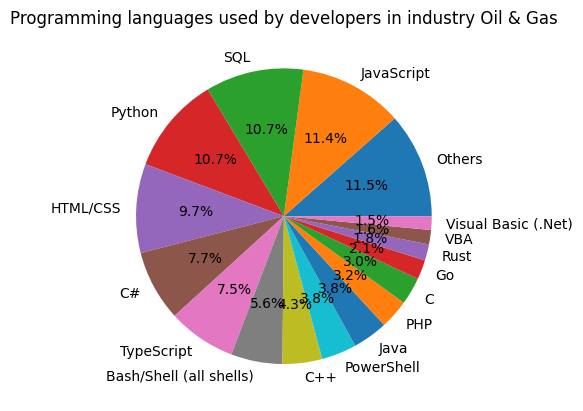

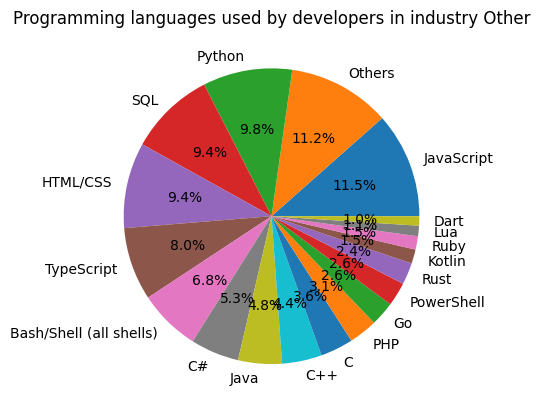

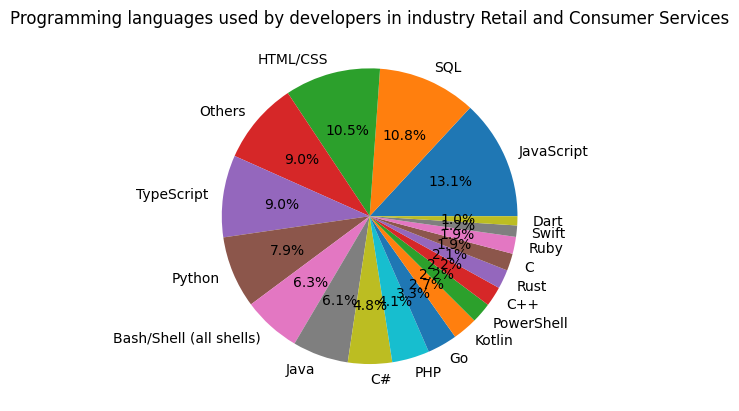

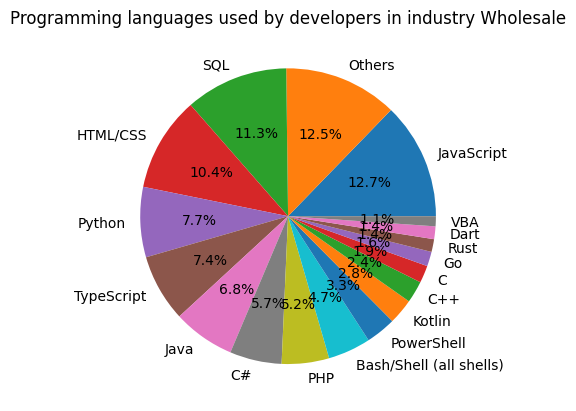

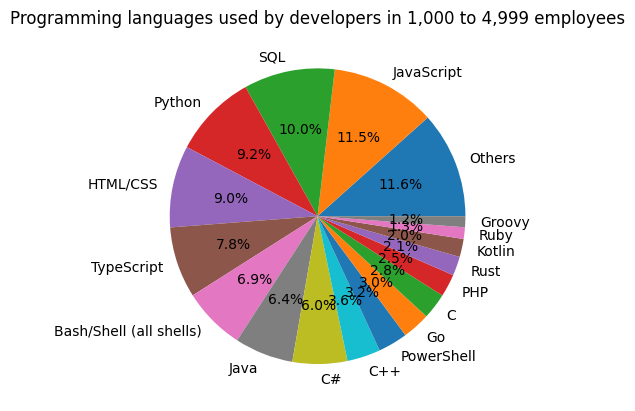

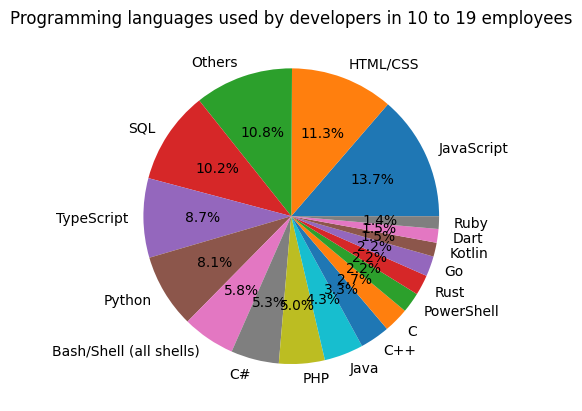

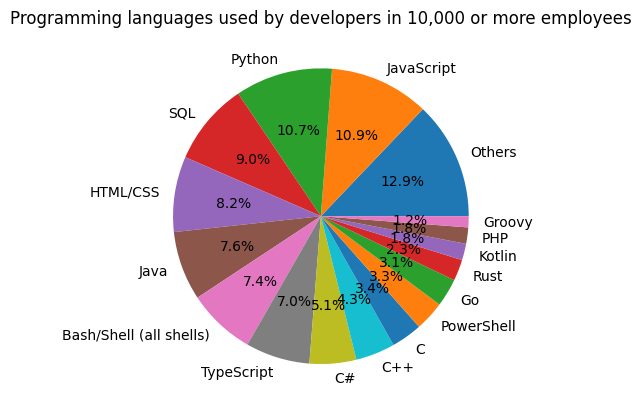

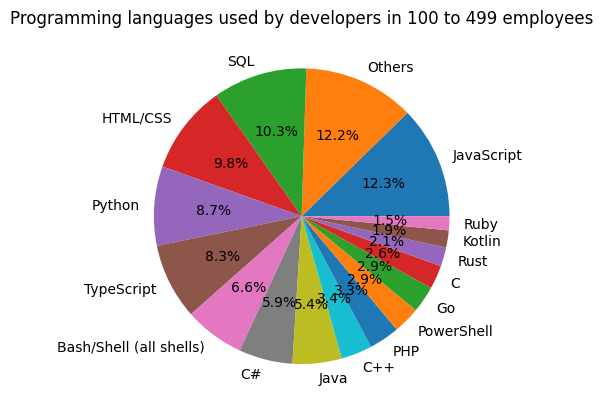

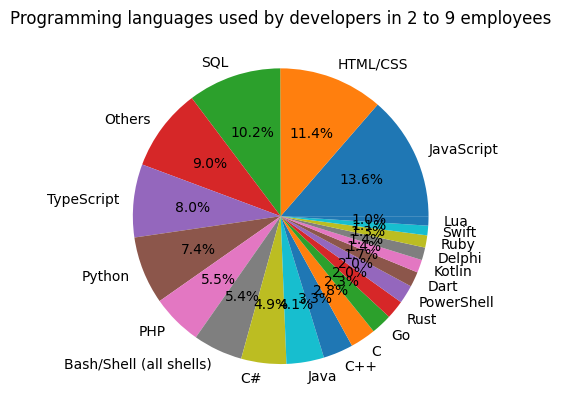

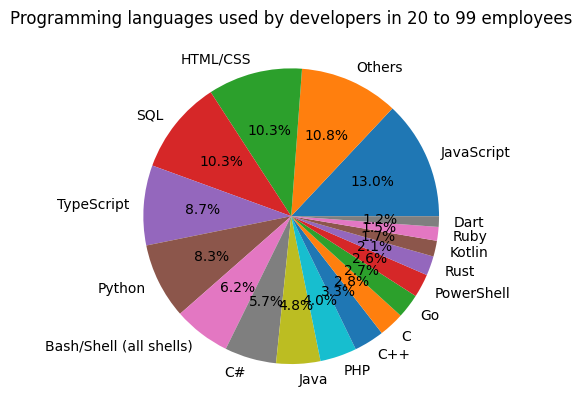

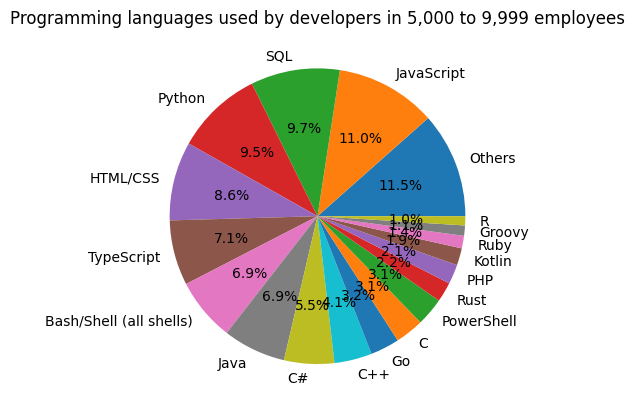

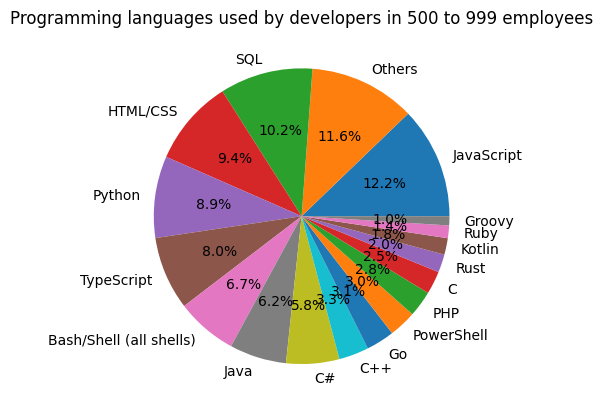

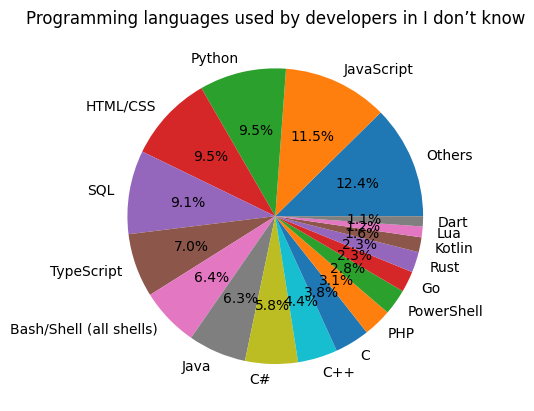

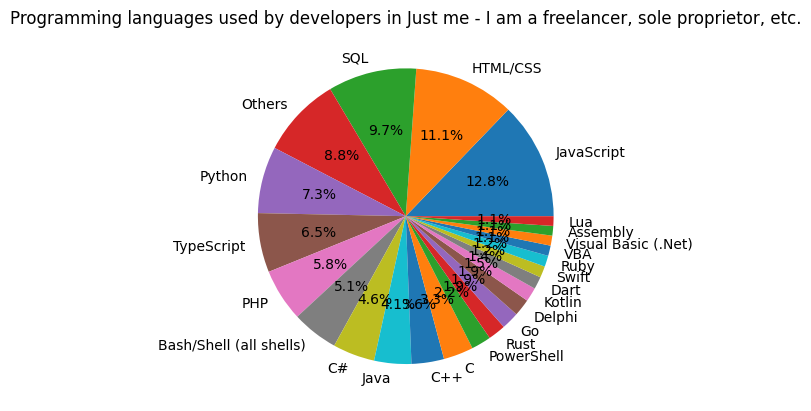

In [93]:
series_languages = df["LanguageHaveWorkedWith"].str.split(";", expand=True).stack()
df_languages = df.copy()
index_list = series_languages.index.get_level_values(0).unique().to_list()
df_languages = df_languages.loc[index_list]
df_languages["Split_languages"] = series_languages.groupby(series_languages.index.get_level_values(0)).apply(lambda x: x.tolist())

langs_by_industry = df_languages.groupby("Industry")["Split_languages"]
for industry, langs in langs_by_industry:
    langs = langs.explode().value_counts()
    langs_sum = langs.sum()
    langs_filter = langs_sum * 0.01
    langs_others = langs[langs <= langs_filter].sum()
    langs = langs[langs > langs_filter]
    pie_by_org_size_values = langs.add(pd.Series(langs_others, index=["Others"]), fill_value=0)
    pie_by_org_size_values = pie_by_org_size_values.sort_values(ascending=False)
    fig, ax = plt.subplots()
    ax.pie(pie_by_org_size_values, labels=pie_by_org_size_values.index, autopct='%1.1f%%')
    ax.set_title("Programming languages used by developers in industry " + industry)
    fig.show()

langs_by_org_size = df_languages.groupby("OrgSize")["Split_languages"]
for org_size, langs in langs_by_org_size:
    langs = langs.explode().value_counts()
    langs_sum = langs.sum()
    langs_filter = langs_sum * 0.01
    langs_others = langs[langs <= langs_filter].sum()
    langs = langs[langs > langs_filter]
    pie_by_org_size_values = langs.add(pd.Series(langs_others, index=["Others"]), fill_value=0)
    pie_by_org_size_values = pie_by_org_size_values.sort_values(ascending=False)
    fig, ax = plt.subplots()
    ax.pie(pie_by_org_size_values, labels=pie_by_org_size_values.index, autopct='%1.1f%%')
    ax.set_title("Programming languages used by developers in " + org_size)
    fig.show()

